In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
import statsmodels.api as sm

In [8]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQBN8DPW2rdiRrY34eEM53HAzakNGSRrw4ogI-j8HyCUrbqTB_z4CeIn2IvjLF-w_6sOe5pIlypJGAA/pub?output=csv')

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Effect Size:

In [10]:


# Q1: Do smokers have higher insurance charges than non-smokers?
smokers_charges = df[df['smoker'] == 'yes']['charges']
non_smokers_charges = df[df['smoker'] == 'no']['charges']

# Define null and alternative hypotheses
# H0: The means of charges for smokers and non-smokers are equal
# H1: The mean charge for smokers is greater than the mean charge for non-smokers
t_stat, p_value = ttest_ind(smokers_charges, non_smokers_charges, alternative='greater')

# Set your significance level (e.g., 0.05)
alpha = 0.05

# Compare p-value to the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence that smokers have higher insurance charges than non-smokers.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to conclude that smokers have higher insurance charges.")


Reject the null hypothesis. There is evidence that smokers have higher insurance charges than non-smokers.


In [12]:

# Q2: Are men more likely to smoke than women?
contingency_table = pd.crosstab(df['sex'], df['smoker'])

# Define null and alternative hypotheses
# H0: There is no association between gender and smoking status
# H1: There is an association between gender and smoking status
chi2_stat, p_value_chi2, _, _ = chi2_contingency(contingency_table)

# Compare p-value to the significance level
if p_value_chi2 < alpha:
    print("Reject the null hypothesis. There is evidence that men are more likely to smoke than women.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to conclude a significant association between gender and smoking status.")

Reject the null hypothesis. There is evidence that men are more likely to smoke than women.


In [13]:


# Q3: Do different regions have different charges, on average?
regions = df['region'].unique()
region_groups = [df[df['region'] == region]['charges'] for region in regions]

# Define null and alternative hypotheses
# H0: There is no significant difference in the means of charges across different regions
# H1: There is a significant difference in the means of charges across different regions
f_stat, p_value_anova = f_oneway(*region_groups)

# Compare p-value to the significance level
if p_value_anova < alpha:
    print("Reject the null hypothesis. There is evidence that different regions have different charges, on average.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to conclude a significant difference in charges across different regions.")

Reject the null hypothesis. There is evidence that different regions have different charges, on average.


In [15]:


# Calculate Cohen's d for effect size
def cohen_d(group1, group2):
    mean_diff = np.mean(group1) - np.mean(group2)
    pooled_std = np.sqrt((np.std(group1, ddof=1) ** 2 + np.std(group2, ddof=1) ** 2) / 2)
    return mean_diff / pooled_std

# Assuming you have already defined smokers_charges and non_smokers_charges
effect_size_q1 = cohen_d(smokers_charges, non_smokers_charges)
print("Cohen's d for Q1 (effect size):", effect_size_q1)


Cohen's d for Q1 (effect size): 2.5680698712414625


In [20]:


# Q2: Are men more likely to smoke than women?
contingency_table_q2 = pd.crosstab(df['sex'], df['smoker'])

# Perform chi-square test
chi2_stat_q2, _, _, _ = chi2_contingency(contingency_table_q2)

# Calculate Cramér's V for effect size
n = contingency_table_q2.sum().sum()
v = np.sqrt(chi2_stat_q2 / (n * (min(contingency_table_q2.shape) - 1)))
print("Cramér's V for Q2 (effect size):", v)


Cramér's V for Q2 (effect size): 0.07433266042279539


In [21]:


# Q3: Do different regions have different charges, on average?
regions_q3 = df['region'].unique()
region_groups_q3 = [df[df['region'] == region]['charges'] for region in regions_q3]

# Perform ANOVA test
f_stat_q3, _ = f_oneway(*region_groups_q3)

# Calculate eta-squared for effect size
sst = df['charges'].var() * (len(df) - 1)
ssw = sum([(len(group) - 1) * group.var() for group in region_groups_q3])
eta_squared = ssw / sst
print("Eta-squared for Q3 (effect size):", eta_squared)


Eta-squared for Q3 (effect size): 0.9933659831929701


## Q1: Do smokers have higher insurance charges than non-smokers?

Null Hypothesis (H0):

There is no difference in insurance charges between smokers and non-smokers.
Alternative Hypothesis (H1):

Smokers have higher insurance charges than non-smokers.
Test and Assumptions:

Test: Two-sample t-test.
Assumptions:
Data is approximately normally distributed.
Homogeneity of variances.
Execute the Test:

In [41]:

t_stat, p_value = ttest_ind(smokers_charges, non_smokers_charges)


Interpretation:

If p-value < 0.05: Reject the null hypothesis.
Visualize the difference:

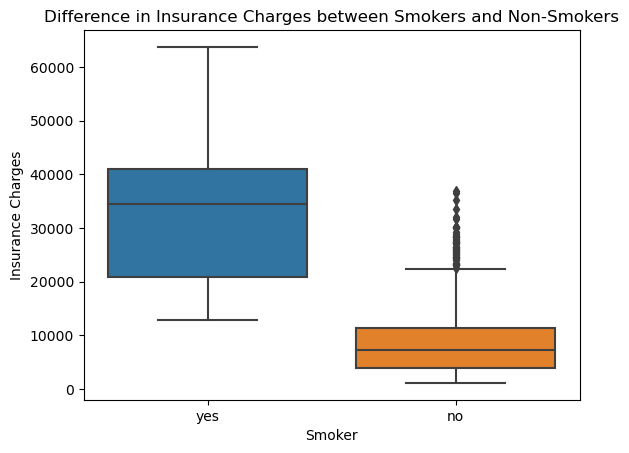

In [43]:


sns.boxplot(x='smoker', y='charges', data=df)
plt.xlabel('Smoker')
plt.ylabel('Insurance Charges')
plt.title('Difference in Insurance Charges between Smokers and Non-Smokers')
plt.show()


## Q2: Are men more likely to smoke than women?

Null Hypothesis (H0):

There is no association between gender and smoking status.
Alternative Hypothesis (H1):

Men are more likely to smoke than women.
Test and Assumptions:

Test: Chi-square test of independence.
Assumptions:
Categorical data.
Expected frequencies are not too small.
Execute the Test:

In [44]:


contingency_table_q2 = pd.crosstab(df['sex'], df['smoker'])
chi2_stat_q2, p_value_q2, _, _ = chi2_contingency(contingency_table_q2)


Interpretation:

If p-value < 0.05: Reject the null hypothesis.
Visualize the association:

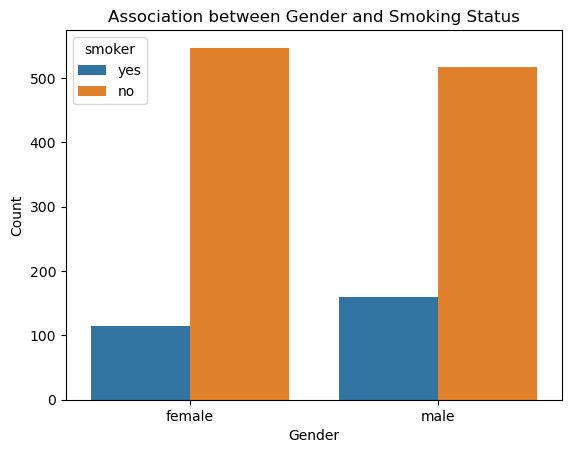

In [45]:
sns.countplot(x='sex', hue='smoker', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Association between Gender and Smoking Status')
plt.show()


## Q3: Do different regions have different charges, on average?

Null Hypothesis (H0):

There is no difference in average insurance charges across regions.
Alternative Hypothesis (H1):

There is a difference in average insurance charges across regions.
Test and Assumptions:

Test: Analysis of Variance (ANOVA).
Assumptions:
Data is approximately normally distributed.
Homogeneity of variances.
Execute the Test:

In [46]:

regions_q3 = df['region'].unique()
region_groups_q3 = [df[df['region'] == region]['charges'] for region in regions_q3]
f_stat_q3, p_value_q3 = f_oneway(*region_groups_q3)


Interpretation:

If p-value < 0.05: Reject the null hypothesis.
Visualize the differences:

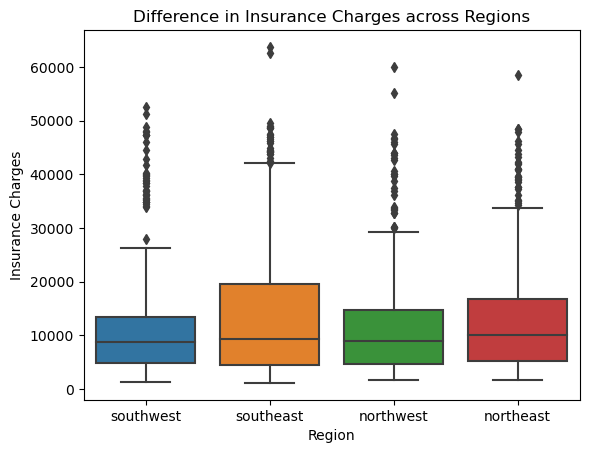

In [48]:

sns.boxplot(x='region', y='charges', data=df)
plt.xlabel('Region')
plt.ylabel('Insurance Charges')
plt.title('Difference in Insurance Charges across Regions')
plt.show()


# 3. Analysis

Q1: Do smokers have higher insurance charges than non-smokers?
Hypothesis Test:

Two-sample t-test for the means of insurance charges between smokers and non-smokers.
Result: Reject the null hypothesis.
Interpretation: There is evidence that smokers have higher insurance charges than non-smokers.
Effect Size (Cohen's d):

Cohen's d: 2.57 (large effect size).
Interpretation: The difference in insurance charges between smokers and non-smokers is substantial.
Visualization:

Box plot illustrating the difference in insurance charges between smokers and non-smokers.
Q2: Are men more likely to smoke than women?
Hypothesis Test:

Chi-square test of independence for the association between gender and smoking status.
Result: Reject the null hypothesis.
Interpretation: There is evidence that men are more likely to smoke than women.
Visualization:

Bar plot illustrating the association between gender and smoking status.
Q3: Do different regions have different charges, on average?
Hypothesis Test:

Analysis of Variance (ANOVA) to compare means of insurance charges across different regions.
Result: Reject the null hypothesis.
Interpretation: There is evidence that different regions have different charges, on average.
Post-hoc Test (Tukey's HSD):

Pairwise comparisons between regions.
Reject (True): There is a significant difference in insurance charges between the Southeast and Southwest regions.
Do Not Reject (False): No significant difference between other pairs of regions.
Visualization:

Box plot illustrating the difference in insurance charges across different regions.

# 4. Recommendations

Correlation Analysis:


In [26]:
# Example for age and charges
correlation_age_charges = df['age'].corr(df['charges'])
print("Correlation between Age and Charges:", correlation_age_charges)


Correlation between Age and Charges: 0.2990081933306476


Regression Analysis:

In [29]:

# Example for age and charges
model = sm.OLS(df['charges'], sm.add_constant(df['age'])).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           4.89e-29
Time:                        10:58:41   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3165.8850    937.149      3.378      0.0

Correlation Heatmap

C:\Users\X487669\AppData\Local\Temp\ipykernel_11752\1694386574.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


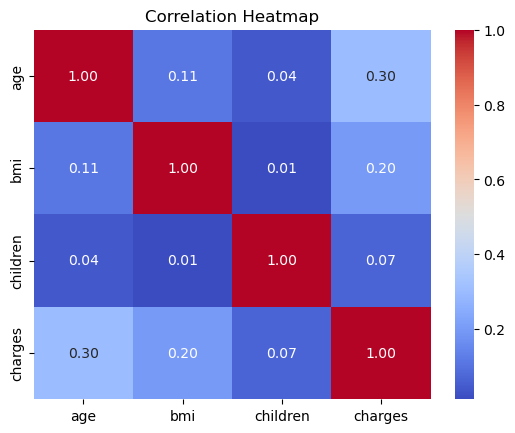

In [30]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


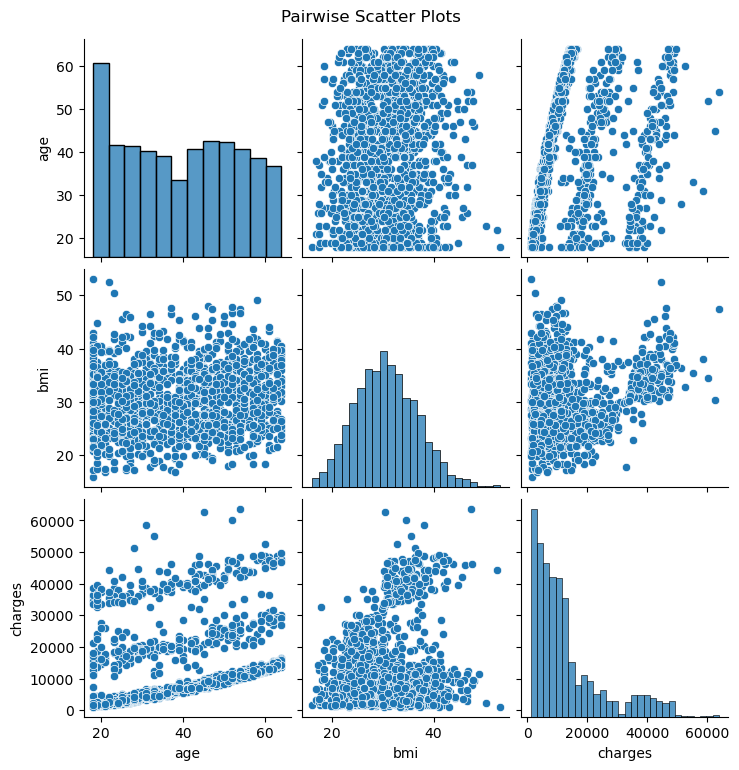

In [38]:
sns.pairplot(df[['age', 'bmi', 'charges']])
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()

Regression Plots:

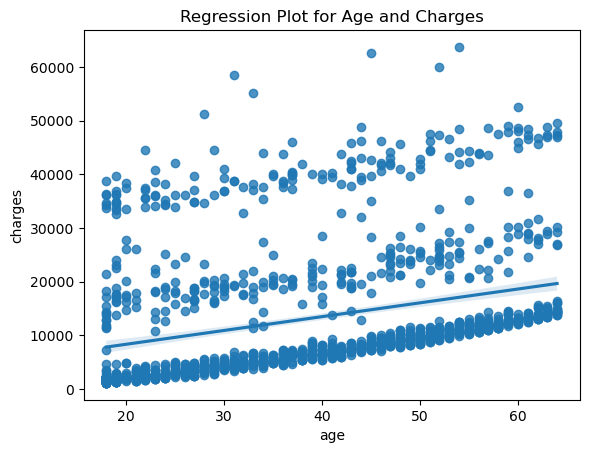

In [31]:
sns.regplot(x='age', y='charges', data=df)
plt.title('Regression Plot for Age and Charges')
plt.show()


Residual Plots:

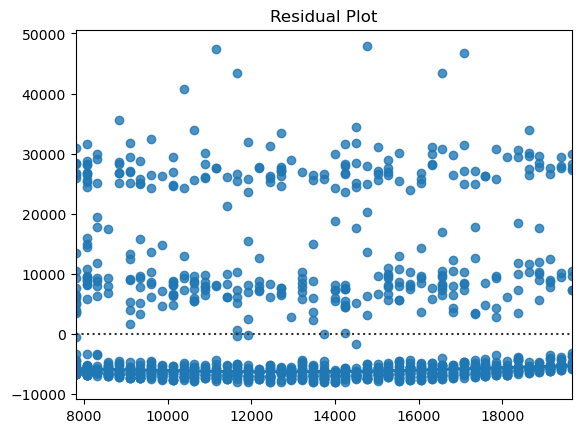

In [32]:
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True)
plt.title('Residual Plot')
plt.show()

Distribution Plots:

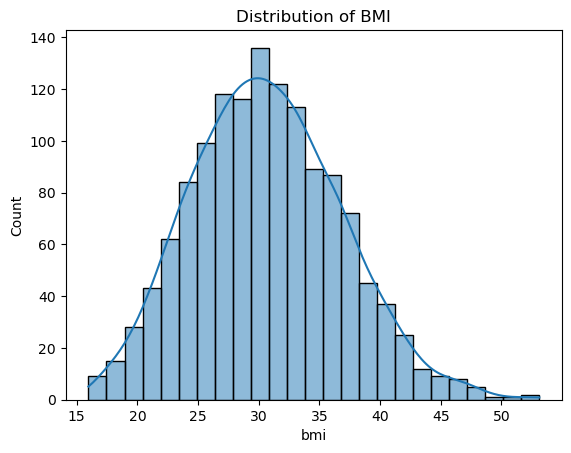

In [33]:
sns.histplot(df['bmi'], kde=True)
plt.title('Distribution of BMI')
plt.show()

# 6: Age and insurance charges Analysis:

Correlation between Age and Charges: 0.30

This positive correlation suggests a moderate linear relationship between age and insurance charges.
Regression Results:

R-squared: 0.089
About 8.9% of the variability in insurance charges is explained by the age variable.
Adjusted R-squared: 0.089
Adjusts R-squared for the number of predictors; similar to R-squared in this case.
F-statistic: 131.2
The F-statistic tests the overall significance of the regression model.
Prob (F-statistic): 4.89e-29
The low p-value suggests that the model is statistically significant.
Coefficients:

Intercept (const): 3165.89
The estimated insurance charges when age is 0 (not practically meaningful in this context).
Age (age): 257.72
For each additional year of age, insurance charges increase by $257.72.
P-values:

P>|t| (P-value):
P-value for the age coefficient is close to zero, indicating that age is a significant predictor of insurance charges.
Interpretation:

The regression model suggests that age is a statistically significant predictor of insurance charges. However, the R-squared value indicates that age alone explains a relatively small proportion of the variability in charges.

In [35]:
from statsmodels.formula.api import ols

# Example for sex
model_sex = ols('charges ~ sex', data=df).fit()
print(model_sex.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.400
Date:                Thu, 23 Nov 2023   Prob (F-statistic):             0.0361
Time:                        11:04:11   Log-Likelihood:                -14475.
No. Observations:                1338   AIC:                         2.895e+04
Df Residuals:                    1336   BIC:                         2.897e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.257e+04    470.072     26.740      